Laboratorio atractor de lorentz

# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para realizar la integración del sistema de ecuaciones diferenciales

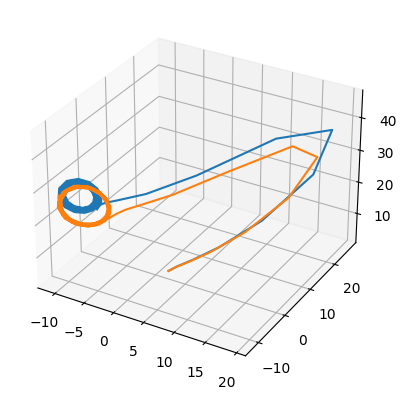

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Función que define el sistema de ecuaciones diferenciales
def modelo(X, t, sigma, beta, rho):
    x, y, z = X

    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z

    return [dxdt, dydt, dzdt]

# Parámetros
sigma = 10.0
beta = 8.0/3.0

# Condiciones iniciales
x0 = 1.5
y0 = 1.5
z0 = 1.5

# Integrar
t = np.linspace(0, 5, 100)
X0 = [x0, y0, z0]

solucion1 = odeint(modelo, X0, t, args=(sigma, beta, 28))
solucion2 = odeint(modelo, X0, t, args=(sigma, beta, 25))

# Graficar
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(solucion1[:,0], solucion1[:,1], solucion1[:,2])
ax.plot3D(solucion2[:,0], solucion2[:,1], solucion2[:,2])

plt.draw()
plt.show()

# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


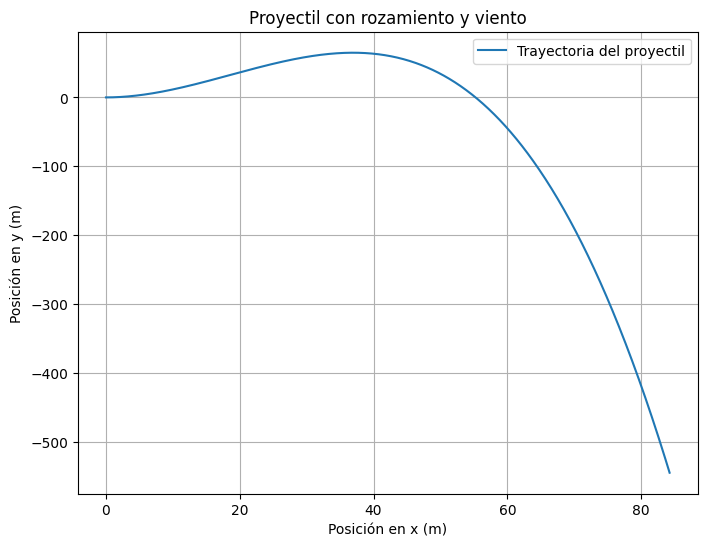

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
m = 0.1  # masa del proyectil
g = 9.8  # aceleración debida a la gravedad
b = 0.02  # coeficiente de fricción
u = 10.0  # velocidad del viento
alpha = np.radians(30)  # ángulo del viento en radianes
v0 = 30.0  # rapidez inicial del proyectil
theta0 = np.radians(45)  # ángulo de lanzamiento en radianes
initial_position = np.array([0, 0])  # posición inicial

# Funciones que definen las ecuaciones diferenciales
def dx_dt(t, x, vx, vy):
    return u * np.cos(alpha) - (b / m) * (v0 * np.cos(theta0) - u * np.cos(alpha)) * (1 - np.exp(-b * t))

def dy_dt(t, x, vx, vy):
    return (1 / b) * ((g / b) + v0 * np.sin(theta0) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - ((g / b) - u * np.sin(alpha)) * t

# Método de Euler para resolver las ecuaciones diferenciales
def euler_method(dt, num_steps):
    t_values = np.zeros(num_steps + 1)
    x_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    vx_values = np.zeros(num_steps + 1)
    vy_values = np.zeros(num_steps + 1)

    t = 0
    x, y = initial_position
    vx = v0 * np.cos(theta0)
    vy = v0 * np.sin(theta0)

    for i in range(num_steps + 1):
        t_values[i] = t
        x_values[i] = x
        y_values[i] = y
        vx_values[i] = vx
        vy_values[i] = vy

        dx = dx_dt(t, x, vx, vy) * dt
        dy = dy_dt(t, x, vx, vy) * dt

        x += dx
        y += dy
        vx += dx_dt(t, x, vx, vy) * dt
        vy += dy_dt(t, x, vx, vy) * dt

        t += dt

    return t_values, x_values, y_values

# Parámetros para la simulación
dt = 0.01  # tamaño del paso de tiempo
num_steps = 1000  # número de pasos de tiempo

# Ejecutar simulación
t_values, x_values, y_values = euler_method(dt, num_steps)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Trayectoria del proyectil')
plt.title('Proyectil con rozamiento y viento')
plt.xlabel('Posición en x (m)')
plt.ylabel('Posición en y (m)')
plt.legend()
plt.grid(True)
plt.show()
